In [1]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set()  # make plots nicer"

Now we can import our table and start some data visualization so we can see which columns will be important and which can be deleted

In [2]:
# Download from GitLab to ensure compatibility with Google Colab
rain = pd.read_excel('https://gitlab.com/sceptri-university/courses/ib031-project/-/raw/main/australia_weather.xlsx', parse_dates = [0], date_format="%d/%m/%Y")

Let us see what the table looks like

> Jak již bylo zmíněno, data máme ve formě excelové tabulky, která obsahuje 24 sloupců– atributů. Jedná se o následující sloupce

In [3]:
rain.head()

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0 2008-11-16       Brisbane     21.0     31.9       0.0          6.4   
1 2009-06-11     Wollongong      6.6     16.0       0.0          NaN   
2 2010-03-29  BadgerysCreek     19.1     24.3       0.8          NaN   
3 2016-03-29         Cairns     22.9     32.6       0.0          NaN   
4 2012-08-22         Sydney     10.6     24.7       0.0          3.8   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0       9.7          SE           48.0          E  ...        64.0   
1       NaN          SW           37.0          W  ...        37.0   
2       NaN         NaN            NaN        NaN  ...         NaN   
3      10.7          SE           37.0          S  ...        58.0   
4       9.1         NaN            NaN        WNW  ...        54.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1012.6       1007.9       3.0       7.0     27.9     28.2         No   
1       1020.0       1018.0       NaN       NaN     10.6     15.5         No   
2       1017.5          NaN       NaN       NaN     21.2      NaN         No   
3       1016.5       1013.2       1.0       2.0     28.3     31.2         No   
4       1015.5       1010.4       6.0       6.0     16.1     20.8         No   

   RISK_MM  RainTomorrow  
0     31.8           Yes  
1      0.0            No  
2      7.0           Yes  
3      0.0            No  
4      0.0            No  

[5 rows x 24 columns]

In [4]:
list(rain)

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

Also, we can check the amount of duplicate rows:

In [5]:
duplicates = rain.duplicated()
print( "Amount of duplicates:", duplicates[duplicates == True].count() )

Amount of duplicates: 14219


Of course, we can remove them...

In [6]:
rain.drop_duplicates(inplace=True)

> Zjistili jsme, že sloupce *Evaporation, Sunshine, Cloud9am, Cloud3pm* obsahují velké množství chybějících hodnot, minimálně 37 %. Vzhledem k tomu, o jak velké procentuální množství se jedná, jsme se
rozhodli tyto sloupce z datasetu vypustit.

In [7]:
rain.info() # Non-null count 
100*(rain.isnull().sum())/len(rain) # null percentage

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 156411
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  Press

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64

Just to be sure, we can try to plot the amount of missing data (here `Cloud3pm`) per location (so that we may rule out that one location is particularly bad)

In [8]:
# First group data by location, then select only columns we are interested in
grouped = rain.groupby(by="Location")[["Evaporation", 
	"Sunshine", 
	"Cloud9am", 
	"Cloud3pm"]
].count()

# Now for each column, we convert the missing value to percentage
grouped = grouped.reset_index()
for location in rain.Location.unique():
  for col in grouped.iloc[:,1:]:
    grouped.loc[grouped.Location == location, col] = round(100 * (
		1 - grouped.loc[grouped.Location == location, col] / 
         len(rain[rain.Location == location])
	), 2)

grouped.head()

/run/user/1000/ipykernel_30545/2238846018.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.6]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped.loc[grouped.Location == location, col] = round(100 * (
/run/user/1000/ipykernel_30545/2238846018.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.52]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped.loc[grouped.Location == location, col] = round(100 * (
/run/user/1000/ipykernel_30545/2238846018.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.03]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped.loc[grouped.Location == location, col] = round(100 * (
/run/user/1000/ipyke

Location  Evaporation  Sunshine  Cloud9am  Cloud3pm
0       Adelaide        46.63     45.05    100.00    100.00
1         Albany         9.28     16.78      1.16     23.04
2         Albury       100.00    100.00     57.42     53.01
3   AliceSprings         6.96     16.86     10.95     11.81
4  BadgerysCreek       100.00    100.00    100.00    100.00

And nicely plot it...

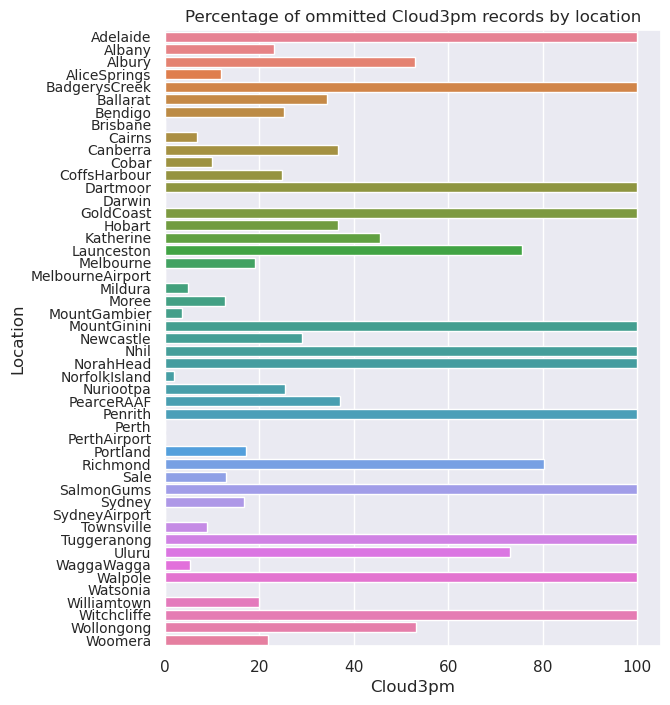

In [9]:
plt.figure().set_figheight(8)
plt.yticks(fontsize=10)
plt.title("Percentage of ommitted Cloud3pm records by location")
bplot = sns.barplot(x=grouped.Cloud3pm, y=grouped.Location, hue=grouped.Location)

Moreover, we should check the approximate ratio of rainy days

In [10]:
print(rain[rain.RainToday == "Yes"].RainToday.count() / rain.RainToday.count())
print(rain[rain.Rainfall > 10].RainToday.count() / rain.RainToday.count())

0.2234226171450489
0.06488525218947772


We can see that columns **Evaporation**, **Sunshine**, **Cloud9am** and **Cloud3pm** contain too many null values (approximately 40%, up to 47%) so we can remove them:

In [11]:
rain = rain.drop(columns=["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "RainTomorrow", "RainToday"])

In [12]:
for col in ["Location", "WindGustDir", "WindDir9am", "WindDir3pm"]:
    rain[col] = rain[col].astype("category")

In [13]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 156411
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  category      
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   WindGustDir    132863 non-null  category      
 6   WindGustSpeed  132923 non-null  float64       
 7   WindDir9am     132180 non-null  category      
 8   WindDir3pm     138415 non-null  category      
 9   WindSpeed9am   140845 non-null  float64       
 10  WindSpeed3pm   139563 non-null  float64       
 11  Humidity9am    140419 non-null  float64       
 12  Humidity3pm    138583 non-null  float64       
 13  Pressure9am    128179 non-null  float64       
 14  Pressure3pm    128212 non-null  float64       
 15  Temp9

Ratio of individual locations.

In [14]:
round( 100 * rain.Location.value_counts(normalize=True, ascending=True), 2 ) #/ 2.4 #.sum()

Location
Uluru               1.07
Katherine           1.10
Nhil                1.10
Melbourne           1.71
Williamtown         1.80
PearceRAAF          1.94
Walpole             1.98
Moree               2.01
MountGinini         2.04
BadgerysCreek       2.06
NorahHead           2.06
Dartmoor            2.07
Richmond            2.08
Witchcliffe         2.08
CoffsHarbour        2.08
SalmonGums          2.08
Newcastle           2.08
Penrith             2.08
NorfolkIsland       2.08
WaggaWagga          2.09
GoldCoast           2.10
Wollongong          2.10
Cobar               2.10
Cairns              2.10
Woomera             2.10
Portland            2.11
Tuggeranong         2.11
Watsonia            2.11
Sale                2.11
Nuriootpa           2.11
SydneyAirport       2.11
Mildura             2.11
PerthAirport        2.12
MelbourneAirport    2.12
Albury              2.12
Albany              2.12
Launceston          2.13
Ballarat            2.13
MountGambier        2.13
AliceSprings    

We can write down some descriptive statistics

> Vypsáním deskriptivních statistik ještě na netransformovaná data si můžeme všimnout, že v Austrálii
obecně moc neprší. Medián denních srážek je totiž nula a třetí kvartil je na velice nízké hodnotě – 0.8 mm
vody

In [15]:
rain.describe()

Date        MinTemp        MaxTemp  \
count                         142193  141556.000000  141871.000000   
mean   2013-04-01 00:28:51.730816768      12.186400      23.226784   
min              2007-11-01 00:00:00      -8.500000      -4.800000   
25%              2011-01-06 00:00:00       7.600000      17.900000   
50%              2013-05-27 00:00:00      12.000000      22.600000   
75%              2015-06-12 00:00:00      16.800000      28.200000   
max              2017-06-25 00:00:00      33.900000      48.100000   
std                              NaN       6.403283       7.117618   

            Rainfall  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  140787.000000  132923.000000  140845.000000  139563.000000   
mean        2.349974      39.984292      14.001988      18.637576   
min         0.000000       6.000000       0.000000       0.000000   
25%         0.000000      31.000000       7.000000      13.000000   
50%         0.000000      39.000000      13.000000      19.000000   
75%         0.800000      48.000000      19.000000      24.000000   
max       371.000000     135.000000     130.000000      87.000000   
std         8.465173      13.588801       8.893337       8.803345   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1021.586820    1017.823062   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.000000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000   10340.000000   10326.000000   
std        19.051293      20.797772     189.985774     153.206113   

             Temp9am        Temp3pm        RISK_MM  
count  141289.000000  139467.000000  142193.000000  
mean       16.987509      21.687235       2.360682  
min        -7.200000      -5.400000       0.000000  
25%        12.300000      16.600000       0.000000  
50%        16.700000      21.100000       0.000000  
75%        21.600000      26.400000       0.800000  
max        40.200000      46.700000     371.000000  
std         6.492838       6.937594       8.477969

In [16]:
rain.describe().Rainfall

count    140787.000000
mean          2.349974
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
std           8.465173
Name: Rainfall, dtype: float64

We want to find some correlations between particular columns (tbd - ADD more columns maybe):

> Z korelogramu, který vidíme zde na obrázku, můžeme vypozorovat silnou lineární závislost mezi
sloupci teplot v různých částech dne (minimální a maximální denní teplota a pozorování v 9 hodin ráno a
3 hodiny odpoledne). Dává proto smysl tyto sloupce nahradit jejich průměrem, stejně jako sloupce *WindSpeed9am, WindSpeed3pm*, dále *Humidity9am, Humidity3pm* a *Pressure9am, Pressure3pm*.

In [17]:
# Takes an awful long to draw... Ommiting for now
#sns.pairplot(rain[["Rainfall", "MinTemp", "MaxTemp", "Temp9am", "Temp3pm", "RISK_MM"]])

Let us explore the column **Date** more precisely:

In [18]:
days = rain.Date[rain.Location=="Brisbane"]
days

0        2008-11-16
77       2016-11-21
99       2010-04-14
111      2009-07-15
146      2016-12-05
            ...    
156137   2008-10-23
156171   2008-09-25
156335   2011-10-04
156338   2016-06-28
156362   2010-06-27
Name: Date, Length: 3161, dtype: datetime64[ns]

In [19]:
(deltas, delta_indices, day_counts) = np.unique(np.diff(sorted(days)), return_counts = True, return_inverse = True)

<Axes: >

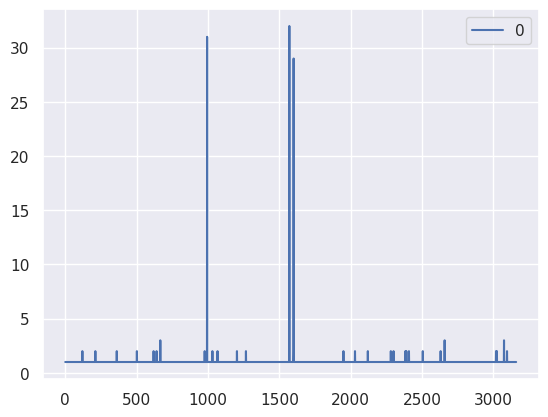

In [20]:
sns.lineplot([map(lambda index : deltas[index].days, delta_indices)])

In [21]:
for i in range(deltas.size):
    print(deltas[i], ":", day_counts[i] / days.size * 100)

1 days 00:00:00 : 98.95602657386902
2 days 00:00:00 : 0.8225245175577348
3 days 00:00:00 : 0.09490667510281556
29 days 00:00:00 : 0.03163555836760519
31 days 00:00:00 : 0.03163555836760519
32 days 00:00:00 : 0.03163555836760519


In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

rain_no_date = rain.drop(columns = ["Date"])

numeric_features = make_column_selector(dtype_include=np.number)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = make_column_selector(dtype_include='category')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = "most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [23]:
np.any(np.isnan(preprocessor.fit_transform(rain_no_date).todense()))

False

Let us now determine some baselines

In [24]:
from sklearn.metrics import root_mean_squared_error, r2_score

def print_rmse(regressor, train_y, train_X, 
		test_y, test_X, 
		validation_y = None, validation_X = None
	):
    print("Root mean squared error:")
    print("Train: ", root_mean_squared_error(train_y, 
		regressor.predict(train_X)))
    if (validation_X is not None and validation_y is not None):
        print("Validation: ", 
			root_mean_squared_error(validation_y, regressor.predict(validation_X)))
    
    print("Test: ", root_mean_squared_error(test_y, 
		regressor.predict(test_X)))


def print_r2(regressor, train_y, train_X, 
		test_y, test_X, 
		validation_y = None, validation_X = None
	):
    print("R^2:")
    print("Train: ", r2_score(train_y, 
		regressor.predict(train_X)))
    if (validation_X is not None and validation_y is not None):
        print("Validation: ", r2_score(validation_y, 
			regressor.predict(validation_X)))
    
    print("Test: ", r2_score(test_y, 
		regressor.predict(test_X)))

In [25]:
def feature_importance(regressor, preprocessor, train_X, n_most_important = 15, feature_selector = (lambda model: model.coef_), limit_features_by = None):
    feature_names = preprocessor.fit(train_X).get_feature_names_out()
    if limit_features_by is not None:
        feature_names = feature_names[limit_features_by]
    coefs = feature_selector(regressor)
    abs_coefs = list(map(lambda val : np.abs(val), coefs))

    sorted_indices = np.argsort(abs_coefs)
    sorted_coefs = coefs[sorted_indices]
    sorted_names = feature_names[sorted_indices]

    limited_indices = list(range(0, n_most_important))

    limited_coefs = sorted_coefs[limited_indices]
    limited_names = sorted_names[limited_indices]
    
    coefficients = pd.DataFrame(
        limited_coefs, columns = ["Coefficients"], index = limited_names
    )

    coefficients.plot(kind="barh", figsize=(9, 7))
    plt.axvline(x=0, color=".5")
    plt.subplots_adjust(left=0.3)

## Time-series-based prediction

First and foremost, we have in fact several separate time series (based on the recorded location), which only correlate with each other. Although I suppose their dynamics are similar, the exact values of "coefficients" in those dynamics will likely differ. Logically, we would need approx. 48 separate time series for every location. The dynamics of each of them might or might not be similar.

Moreover, we have a number of other regressors, which we would not use at all with the time series. Thus I propose to only include an explanation as to why it is a subpar idea, contrary to what we proposed earlier in the video script.

> Jedním z našich návrhů byla časová řada a predikce založená na tomto modelu. Po dalším uvážení se ale zdá tato možnost jako nerozumná rovnou z několika důvodů. První a nejzávažnejší chybou je prostý fakt, že máme 48 lokací, ve kterých bylo počasí zaznamenáváno. Časovou řadou ale myslíme "souvislou" posloupnost pozorování, což by znamenalo, že bychom potřebovali udělat 48 různých modelů časových řad.
>
> I za předpokladu, že dynamika počasí v těchto lokalitách je podobná (což je velmi silný předpoklad) a že máme způsob jak z 48 různých časových řad vytěžit "to podobné/podstatné", stále máme problém, že na skutečnou predikci se budou koeficienty v modelech každé z těchto řad lišit (ale nyní již předpokládáme jistou závislost/korelovanost mezi nimi). V neposlední řadě pak máme ještě problém "děr" v záznamech počasí, kde nám např. chybí celý měsíc pozorování.
>
> Ještě stojí za zmínku, že bychom tímto de facto ignorovali většinu datasety (myšleno ostatní regresory), které ale zajisté hrají roli ve vývoji počasí.

## Linear Regression


In [26]:
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = \
    train_test_split(rain.drop(columns=["RISK_MM"]), 
		rain.RISK_MM,
		random_state = 42
	)
# dummy_regr = DummyRegressor(strategy="quantile", quantile=0.83)

# Note: We're doing regression, thus usage of dummy classifiers is nonsensical
dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(train_X, train_y)
dummy_y = dummy_regr.predict(test_X)

print_rmse(dummy_regr, train_y, train_X, test_y, test_X)
print_r2(dummy_regr, train_y, train_X, test_y, test_X)

Root mean squared error:
Train:  8.573870626274132
Test:  8.1834096109759
R^2:
Train:  0.0
Test:  -6.650531820806549e-07


In [27]:
from sklearn.linear_model import LinearRegression, HuberRegressor, TheilSenRegressor, RANSACRegressor

linear_pipeline = make_pipeline(
    preprocessor,
    LinearRegression()
)

linear_pipeline.fit(train_X, train_y)
linear_y = linear_pipeline.predict(test_X)

print_rmse(linear_pipeline, train_y, train_X, test_y, test_X)
print_r2(linear_pipeline, train_y, train_X, test_y, test_X)

Root mean squared error:
Train:  7.695127873794106
Test:  7.270608760878221
R^2:
Train:  0.19447721349230018
Test:  0.2106433718564591


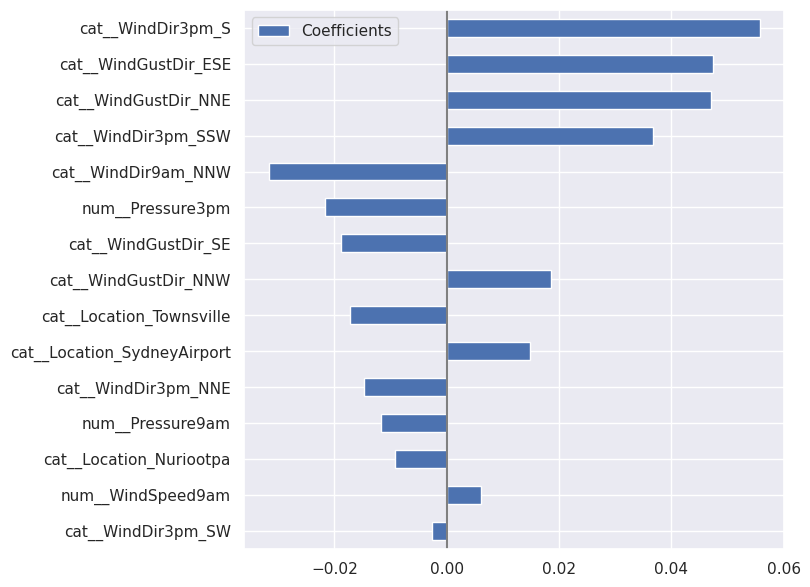

In [28]:
feature_importance(linear_pipeline[1], preprocessor, train_X)

In [29]:
# Theil-Sen requires dense data as input, but our Preprocessor only provides sparse form...
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return np.asarray(X.todense())

In [30]:
# Theil-Sen is impossibly slow and memory-intensive due to needing a dense representation

ransac_pipeline = make_pipeline(
    preprocessor,
    RANSACRegressor(random_state=42, min_samples = 10000, max_trials = 1000, residual_threshold = 0.7)
)

ransac_pipeline.fit(train_X, train_y)
print_rmse(ransac_pipeline, train_y, train_X, test_y, test_X)

Root mean squared error:
Train:  9.987996477204016
Test:  8.942736828948794


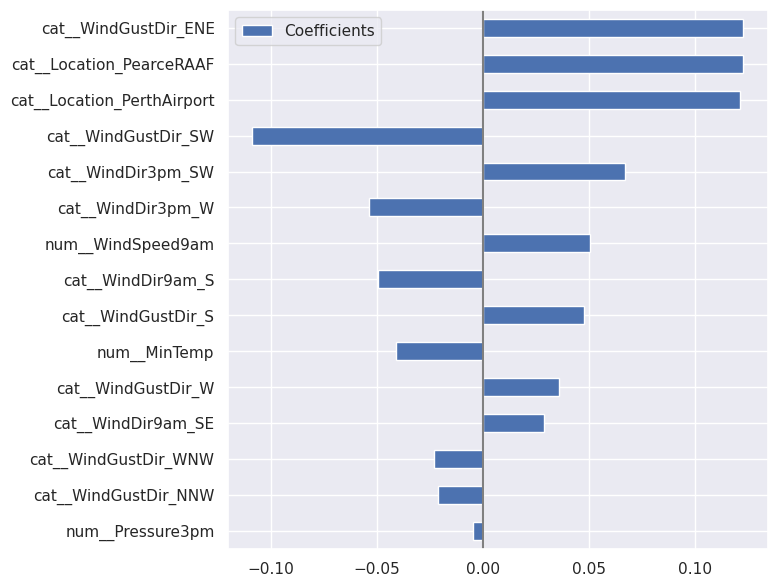

In [31]:
feature_importance(ransac_pipeline[1].estimator_, preprocessor, train_X)

In [39]:
from sklearn.model_selection import GridSearchCV

parameter_grid_huber = [
    {
        'huberregressor__epsilon': [ 10, 100, 1000 ],
        'huberregressor__alpha' : [ 0.001, 0.1, 1, 10, 100 ],
        'huberregressor__max_iter' : [ 200 ]
    }
]

huber_pipeline = make_pipeline(
    preprocessor,
    HuberRegressor()
)

grid_search_huber = GridSearchCV(
    huber_pipeline,
    parameter_grid_huber,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search_huber.fit(train_X, train_y)
print_rmse(grid_search_huber, train_y, train_X, test_y, test_X)

Root mean squared error:
Train:  7.695255218482093
Test:  7.270322371455293


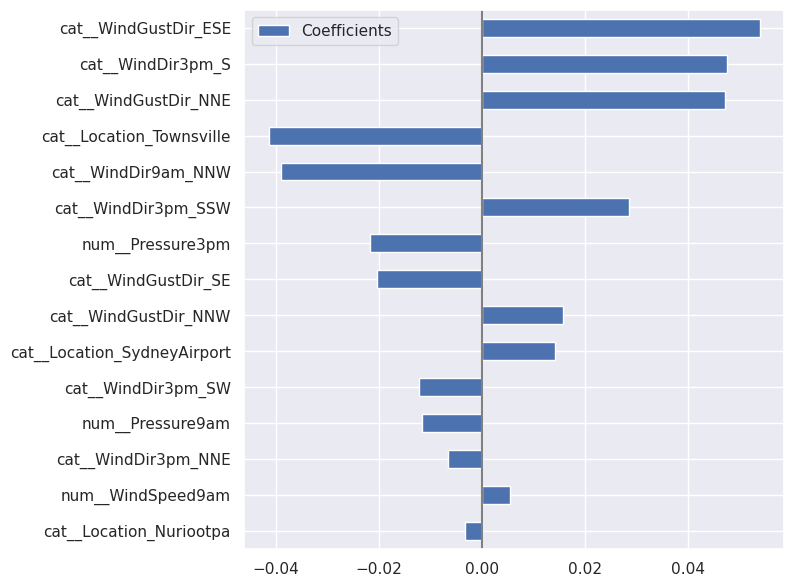

In [40]:
feature_importance(grid_search_huber.best_estimator_[1], preprocessor, train_X)

## Kernel Linear Regression

In [34]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.kernel_approximation import RBFSampler, Nystroem
from sklearn.linear_model import SGDRegressor

kernel_pipeline = make_pipeline(
    preprocessor,
    # An approximation of RBF kernel, as the proper SVM RBF kernel from libsvm has quadratic complexity
    Nystroem(random_state=42, n_components=500),
    SGDRegressor(random_state=42)
)

kernel_pipeline.fit(train_X, train_y)
kernel_y = kernel_pipeline.predict(test_X)

print_rmse(kernel_pipeline, train_y, train_X, test_y, test_X)

Root mean squared error:
Train:  7.465864156352268
Test:  7.055348041412919


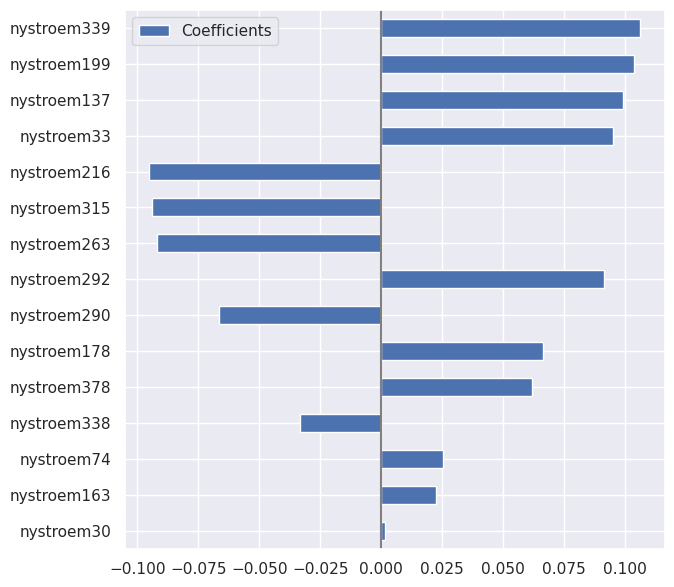

In [35]:
feature_importance(kernel_pipeline[2], make_pipeline(preprocessor, Nystroem(random_state=42, n_components=500)), train_X)

In [ ]:
from sklearn.inspection import permutation_importance
kernel_importance = permutation_importance(kernel_pipeline, train_X, train_y,
                           n_repeats=10,
                           random_state=42)

sorted_idx = kernel_importance.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(train_X.columns[sorted_idx], kernel_importance.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## Neural networks

In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

parameter_grid_mlp = [
    {
        'mlpregressor__activation': ['tanh', 'logistic' ], #[ 'identity', 'logistic', 'tanh', 'relu' ],
        'mlpregressor__hidden_layer_sizes': [  [256, 128, 16, 128, 256],  [128, 128, 128, 128]  ]
    }
]

mlp_pipeline = make_pipeline(
    preprocessor,
    MLPRegressor(random_state = 42, 
                 early_stopping=True)
)

grid_search_mlp = GridSearchCV(
    mlp_pipeline,
    parameter_grid_mlp,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid_search_mlp.fit(train_X, train_y)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63ce6c590>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEnco...nore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7fe63de28310>)])),
                                       ('mlpregressor',
                                        MLPRegressor(early_stopping=True,
                                                     random_state=42))]),
             n_jobs=-1,
             param_grid=[{'mlpregressor__activation': ['tanh', 'logistic'],
                          'mlpregressor__hidden_layer_sizes': [[256, 128, 16,
                                                                128, 256],
                                                               [128, 128, 128,
                                                                128]]}],
             scoring='neg_root_mean_squared_error')

In [29]:
print_rmse(grid_search_mlp, train_y, train_X, test_y, test_X)

Root mean squared error:
Train:  6.600092208124457
Test:  6.532638479013106


In [30]:
grid_search_mlp.best_params_

{'mlpregressor__activation': 'logistic',
 'mlpregressor__hidden_layer_sizes': [128, 128, 128, 128]}

In [204]:
from sklearn.inspection import permutation_importance
mlp_importance = permutation_importance(grid_search_mlp, train_X, train_y,
                           n_repeats=10,
                           random_state=42)

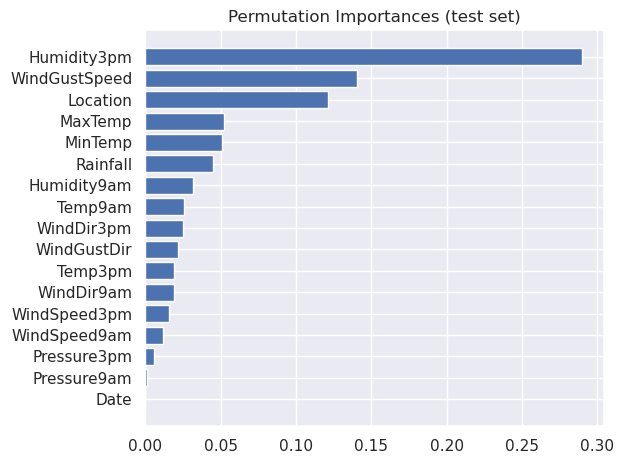

In [207]:
sorted_idx = mlp_importance.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(train_X.columns[sorted_idx], mlp_importance.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

## XGBoost regression

In [140]:
from xgboost import XGBRegressor

xgb_pipeline = make_pipeline(
    preprocessor,
    XGBRegressor()
)

xgb_pipeline.fit(train_X, train_y)
xgb_y = xgb_pipeline.predict(test_X)

print_rmse(xgb_pipeline, train_y, train_X, test_y, test_X)

Root mean squared error:
Train:  4.680976942087746
Test:  6.833260502672578


In [202]:
xgb_pipeline[1].feature_importances_ != 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

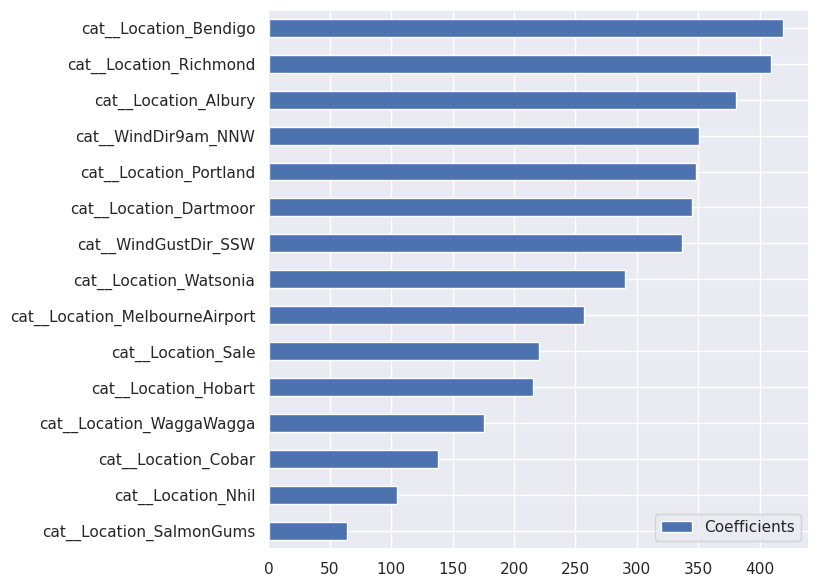

In [199]:
limit_to = xgb_pipeline[1].feature_importances_ != 0
feature_selector = lambda model: np.array(list(model.
                                               get_booster().
                                               get_score(importance_type = "gain").
                                               values()))

feature_importance(xgb_pipeline[1], preprocessor, train_X, 
                   feature_selector = feature_selector, 
                   limit_features_by = limit_to)